In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm


**SECÇAO 1**

In [2]:
# carregamento de dados e metadados
datai = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [3]:
# verificaçao colunas e linhas de dados e metadados
print(datai.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


_Análise de dados e metadados_

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [4]:
data=datai.transpose()

_Descrição e caracterização do dataset_

O objetivo deste estudo era investigar os efeitos de um jejum curto na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e analisadas em quatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar a expressão génica com o tempo de jejum.

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição (que contém todas essas informações juntas).

In [5]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311170     0
ILMN_3311175     0
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
Length: 48107, dtype: int64

Total de valores em falta nos dados:
37632


In [6]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [7]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
ILMN_1343048    float64
ILMN_1343049    float64
ILMN_1343050    float64
ILMN_1343052    float64
ILMN_1343059    float64
                 ...   
ILMN_3311170    float64
ILMN_3311175    float64
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
Length: 48107, dtype: object


In [8]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


_Características dos dados e metadados_

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*. Existem 37632 valores em falta nos dados, que correspondem (como referido anteriormente), aos valores de expressão génica não recolhidos.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

In [9]:
#pre-processamento dos dados
data.dropna(axis="columns", inplace=True)             #removem-se os valores nulos, dropna() remove as linhas que contêm valores nulos
datai.dropna(axis=0,inplace=True )
data_scale = preprocessing.scale(data)
print(data_scale.shape)


(48, 47323)


_Passos do pré-processamento_

Primeiro, eliminaram-se os valores nulos com a função dropna(). Seguidamente, procedeu-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

_Escolha de variáveis de meta-dados_

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas será utilizada uma: "time". 

As variáveis "sample", "individual" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

_Gráficos exploratórios_

In [10]:
descricao=data.describe()
descricao

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.047917,14.441667,7.206250,7.314583,7.302083,7.397917,11.406250,9.845833,7.277083,7.354167,...,7.247917,7.322917,7.293750,7.237500,7.460417,7.241667,7.225000,7.360417,7.220833,7.287500
std,0.245807,0.189998,0.107992,0.092229,0.099978,0.108156,0.362266,0.224042,0.118931,0.109074,...,0.107168,0.127562,0.113749,0.108422,0.128394,0.104847,0.106191,0.116216,0.100970,0.098121
min,12.300000,14.000000,7.000000,7.100000,7.100000,7.200000,10.700000,9.500000,7.000000,7.100000,...,7.000000,7.000000,7.100000,6.900000,7.200000,7.000000,7.000000,7.200000,7.000000,7.100000
25%,12.900000,14.300000,7.200000,7.300000,7.200000,7.300000,11.100000,9.600000,7.200000,7.300000,...,7.200000,7.200000,7.200000,7.200000,7.400000,7.200000,7.200000,7.300000,7.200000,7.200000
50%,13.100000,14.400000,7.200000,7.300000,7.300000,7.400000,11.400000,9.900000,7.300000,7.400000,...,7.250000,7.300000,7.300000,7.200000,7.500000,7.200000,7.200000,7.300000,7.200000,7.300000
75%,13.200000,14.600000,7.200000,7.400000,7.300000,7.500000,11.625000,10.000000,7.325000,7.400000,...,7.300000,7.400000,7.400000,7.300000,7.500000,7.300000,7.300000,7.500000,7.300000,7.400000
max,13.500000,15.000000,7.600000,7.600000,7.600000,7.700000,12.100000,10.500000,7.500000,7.600000,...,7.500000,7.600000,7.500000,7.500000,7.800000,7.500000,7.500000,7.600000,7.500000,7.500000


**SECÇAO 2**

PCA realizado para todos os dados:

[6.00652010e-02 5.69230496e-02 3.82744447e-02 3.37939965e-02
 2.96700818e-02 2.91411319e-02 2.55861292e-02 2.49198978e-02
 2.34602566e-02 2.33634716e-02 2.28557326e-02 2.24160873e-02
 2.13367322e-02 2.12811765e-02 2.03312678e-02 2.02027770e-02
 2.00700632e-02 1.96958449e-02 1.92742287e-02 1.87673361e-02
 1.85293743e-02 1.83705203e-02 1.81618565e-02 1.80245655e-02
 1.78917138e-02 1.77861353e-02 1.76320580e-02 1.74164056e-02
 1.72243474e-02 1.71625092e-02 1.70850126e-02 1.68293419e-02
 1.67969827e-02 1.66771443e-02 1.64783409e-02 1.62990324e-02
 1.61840362e-02 1.60169198e-02 1.58985659e-02 1.58762825e-02
 1.57440996e-02 1.55792569e-02 1.54429585e-02 1.52827806e-02
 1.49580782e-02 1.48114916e-02 1.44112826e-02 4.29184306e-33]
0.9095141516999559


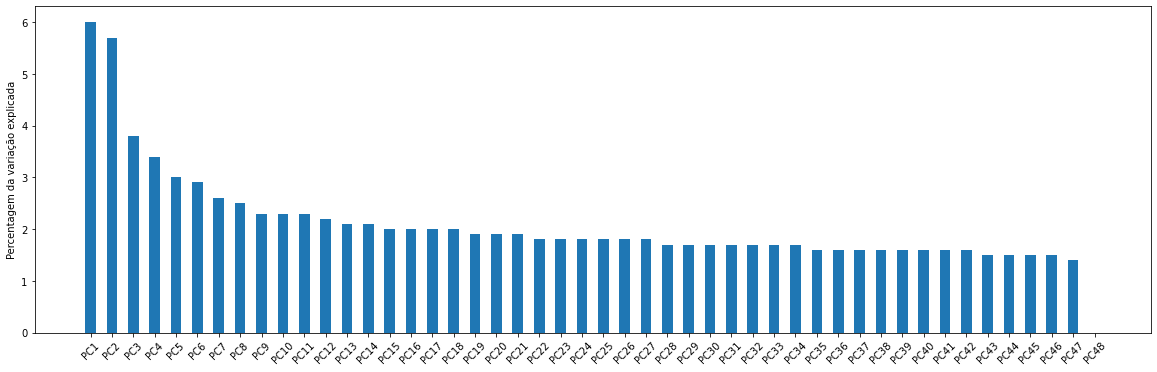

In [11]:
n=48                                                                # existem 48 amostras para proceder à análise
pca = PCA(n_components=n) 
x_reduced = pca.fit(data_scale).transform(data_scale)                                                       # media e desvio                                         # escala
print (pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_[:41].sum())                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

    
plt.show()


Score plot realizado para todos os dados:

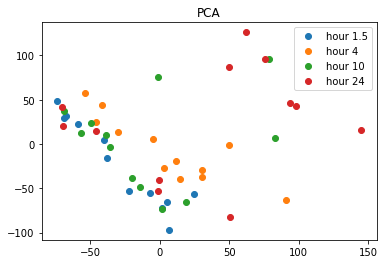

In [12]:
index_samples=[]
for hora in meta.time.unique():
    l=[]
    for i in range(0,48):
        if meta.time[i]==hora:
            l.append(i)
    index_samples.append(l)                               #criaçao de lista de index de 0 a 48, agrupados em listas correspondentes as diferentes horas

i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced[index_samples[i],0],x_reduced[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Através da realização deste PCA, concluiu-se que cada PC explica uma baixa percentagem da variância dos dados. Assim, não se podem tirar conclusões do score plot. 

Método de clustering aplicado a todos os dados:

In [13]:
k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['time'], rownames=['clusters'] )

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,6,4,3,4
1,5,3,1,8
2,0,3,5,0
3,1,2,3,0


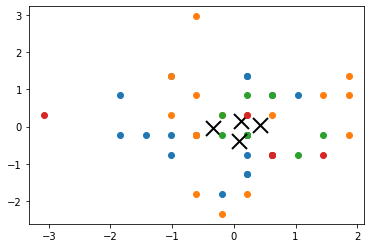

In [14]:
for i in range(k):
    ds = data_scale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

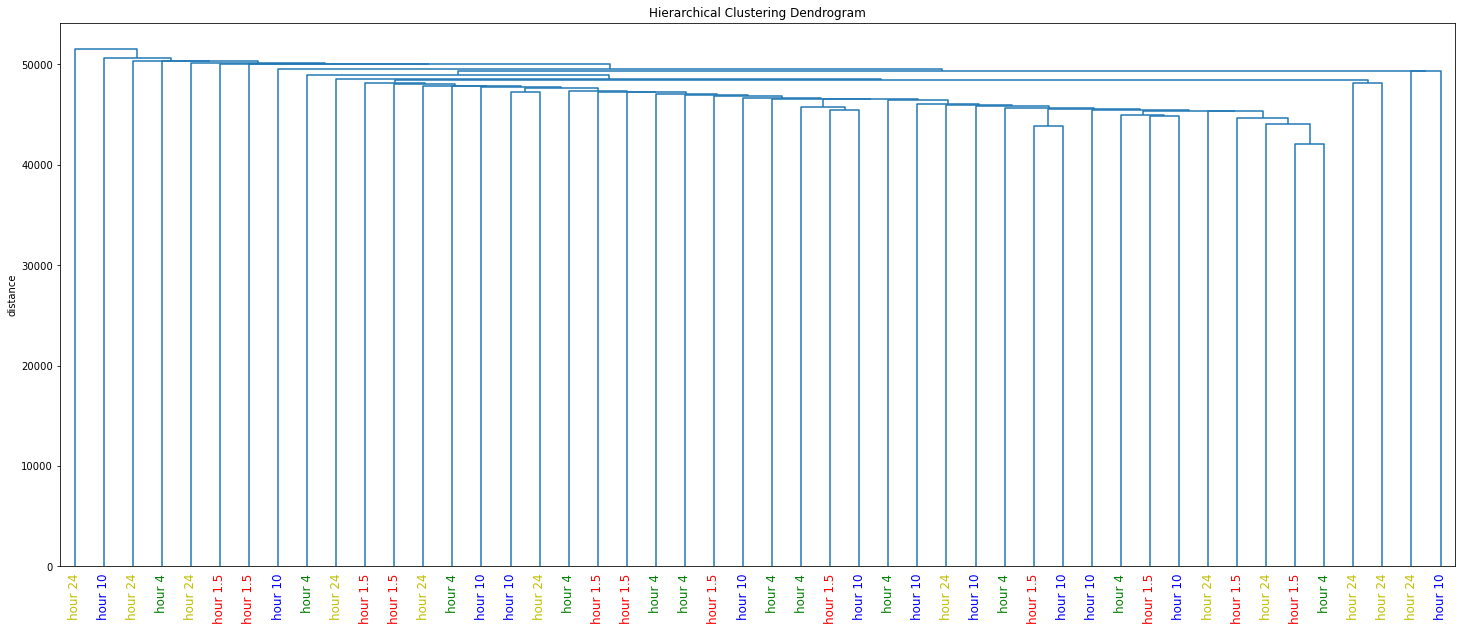

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_scale, metric='cityblock')

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta['time']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'hour 1.5': 'r', 'hour 4': 'g', 'hour 10': 'b', 'hour 24':'y'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Após a realização do clustering, os resultados obtidos não permitem tirar conclusões.

_Análise estatística_

A hipótese nula testada foi:

H0 = A expressão génica não difere entre as diferentes horas de jejum.

O p-value considerado para a rejeição da hipótese nula foi de 0.01.

In [16]:
grps=pd.unique(meta["time"].values)
print(grps)

['hour 1.5' 'hour 4' 'hour 10' 'hour 24']


In [17]:
dic={}
for x in datai.index:
    d_data={grp:data[x][meta.time==grp] for grp in grps}
    dic[x]=d_data

In [18]:
import scipy.stats as stats
l=[]
largar=[]
for gene in datai.index:
    fvalue,pvalue=stats.f_oneway(dic[gene]["hour 1.5"],dic[gene]["hour 4"],dic[gene]["hour 10"],dic[gene]["hour 24"])
    if pvalue>0.01:
        largar.append(gene)           
    else:
        l.append((gene,fvalue,pvalue))

In [19]:
print(len(l),"genes")
for g in l:
    print("Gene:",g[0],"T_test:",g[1],"p value:",g[2])

2047 genes
Gene: ILMN_1651278 T_test: 4.7033603707995395 p value: 0.006208380467881729
Gene: ILMN_1651285 T_test: 19.10158730158732 p value: 4.430180483407496e-08
Gene: ILMN_1651628 T_test: 4.705115001716445 p value: 0.00619676382255548
Gene: ILMN_1651767 T_test: 4.306107431935245 p value: 0.009518663894557147
Gene: ILMN_1651964 T_test: 7.102299806040447 p value: 0.0005406932398925152
Gene: ILMN_1652082 T_test: 9.118673647469462 p value: 8.274286617644603e-05
Gene: ILMN_1652085 T_test: 6.302802174822255 p value: 0.0011880482535628662
Gene: ILMN_1652246 T_test: 4.636453689945512 p value: 0.006668616235952555
Gene: ILMN_1652407 T_test: 7.5574963609898 p value: 0.0003492791656555488
Gene: ILMN_1652549 T_test: 5.051134439553 p value: 0.004294037772672882
Gene: ILMN_1652715 T_test: 5.9928315412186315 p value: 0.0016232991408815468
Gene: ILMN_1652749 T_test: 4.821075268817193 p value: 0.005476904620981481
Gene: ILMN_1652790 T_test: 4.403340926347763 p value: 0.008568065348061118
Gene: ILMN_1

Os 2047 genes acima apresentados rejeitam a hipótese nula, isto é, a sua expressão génica difere significativamente consoante a hora de jejum. 

In [20]:
#criacao de um novo dataframe apenas com os genes que rejeitam a hipotese nula
data_novo=pd.DataFrame(data)
data_novo.drop(largar, axis="columns", inplace=True)

In [21]:
print(data_novo)

            ILMN_1651278  ILMN_1651285  ILMN_1651628  ILMN_1651767  \
GSM1348553           7.7           8.0           9.8           7.2   
GSM1348554           8.0           8.4           9.7           7.5   
GSM1348555           8.1           8.1           9.3           7.3   
GSM1348556           7.8           8.0          10.0           7.7   
GSM1348557           7.8           7.9           9.5           7.4   
GSM1348558           8.0           8.4           9.7           7.2   
GSM1348559           7.9           8.4           8.8           7.5   
GSM1348560           7.8           8.2           9.7           7.4   
GSM1348561           7.8           8.1          10.0           7.2   
GSM1348562           7.9           8.5           9.5           7.2   
GSM1348563           7.9           7.9           9.4           7.3   
GSM1348564           7.7           8.1           8.3           7.5   
GSM1348565           7.8           7.8           9.7           7.1   
GSM1348566          

In [22]:
data_novoscale=preprocessing.scale(data_novo)

PCA realizado para os novos dados:

[2.81822638e-01 1.49133183e-01 4.46346895e-02 3.98919680e-02
 3.44711882e-02 2.56076644e-02 2.44420138e-02 2.39182298e-02
 2.09176760e-02 1.86888674e-02 1.73518408e-02 1.65731282e-02
 1.58810329e-02 1.45384060e-02 1.31172381e-02 1.26324623e-02
 1.20937110e-02 1.13012247e-02 1.12296416e-02 1.07010901e-02
 1.02992369e-02 9.97913590e-03 9.82634742e-03 9.45680174e-03
 9.32388275e-03 8.94004787e-03 8.78705534e-03 8.56229761e-03
 8.20830593e-03 7.84634444e-03 7.82363482e-03 7.66790468e-03
 7.41870244e-03 7.39719058e-03 7.21519002e-03 7.03889796e-03
 6.92936762e-03 6.61102528e-03 6.43081269e-03 6.32982211e-03
 6.04360505e-03 5.97140199e-03 5.87212694e-03 5.60384555e-03
 5.46015790e-03 5.11574606e-03 4.89321887e-03 5.55797154e-32]
0.9056688889229102


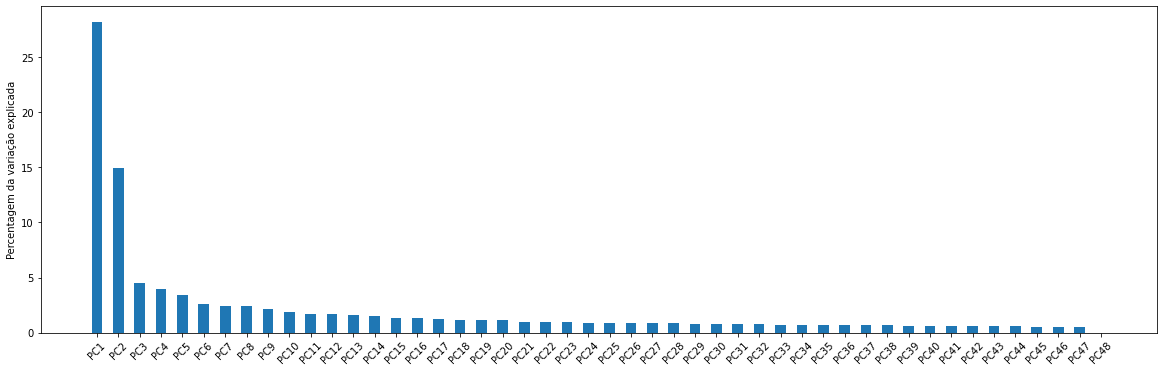

In [23]:
n=48                                                                # existem 48 amostras para proceder à análise
pca_novo = PCA(n_components=n) 
x_reduced_novo = pca_novo.fit(data_novoscale).transform(data_novoscale)                                                       # media e desvio                                         # escala
print (pca_novo.explained_variance_ratio_) 
print(pca_novo.explained_variance_ratio_[:32].sum())                          # 90% da variabilidade

per_var_novo=np.round(pca_novo.explained_variance_ratio_*100, decimals=1)
labels_novo=["PC"+str(x) for x in range(1,len(per_var_novo)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var_novo)+1)], height=per_var_novo, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var_novo)+1)], labels_novo, rotation=45)

    
plt.show()

Verificou-se que, com os novos dados, os dois primeiros PC's explicam cerca de 45% da variância dos dados (uma percentagem muito maior do que a obtida no PCA com todos os dados).

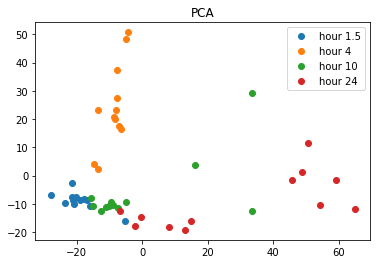

In [24]:
i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced_novo[index_samples[i],0],x_reduced_novo[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Apesar de já se conseguir observar uma maior proximidade entre as amostras (consoante a hora da recolha), o score plot ainda permanece inconclusivo. 

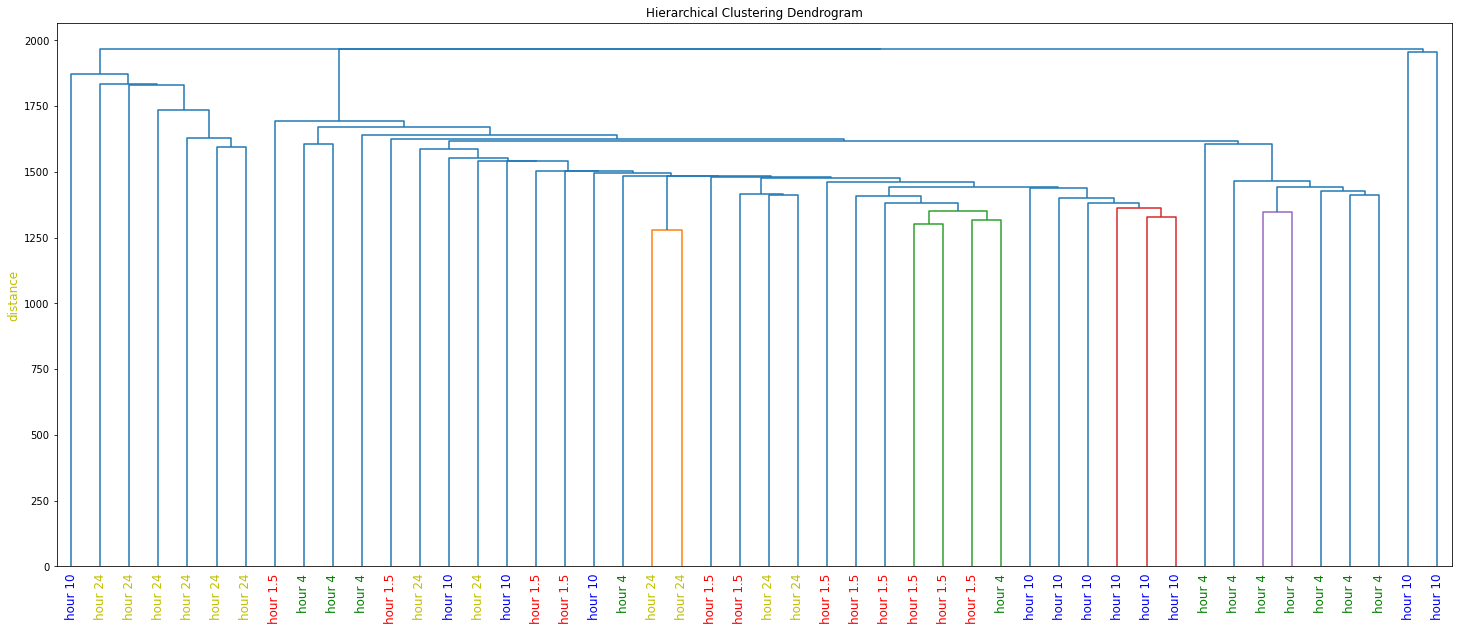

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_novo = linkage(data_novoscale, metric='cityblock')

plt.figure(figsize=(25, 10))
dendrogram(
    Z_novo,
    labels=list(meta['time']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance', fontsize=12, color='y')
# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'hour 1.5': 'r', 'hour 4': 'g', 'hour 10': 'b', 'hour 24':'y'}
ax = plt.gca()
xlbls_novo = ax.get_xmajorticklabels()
for lbl in xlbls_novo:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Mais uma vez, apesar de o gráfico obtido apresentar uma melhor organização do que o anterior, não nos permite tirar conclusões.

In [26]:
k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_novoscale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['time'], rownames=['clusters'] )

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,11,1,0,2
1,0,1,6,0
2,0,1,0,10
3,1,9,6,0


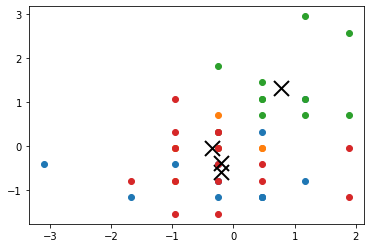

In [27]:
for i in range(k):
    ds = data_novoscale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

O clustering obtido para os novos dados apresenta um melhor agrupamento dos mesmos.

**SECÇAO 3**

A divisão dos dados foi realizada da seguinte maneira:
2/3 para treino e 1/3 para teste.

In [28]:
input_data = data_novo.values
output_data = meta['time'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))
indices = np.random.permutation(len(input_data))
indices

train_in = input_sc[indices[:-16]]                #divisao entre dados de treino e dados de teste
train_out = output_data[indices[:-16]]
test_in  = input_sc[indices[-16:]]
test_out = output_data[indices[-16:]]

48


K-neighbors

In [29]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
from sklearn.metrics import accuracy_score
accuracy_score(preds_knn, test_out)

Valores previstos:  ['hour 1.5' 'hour 4' 'hour 1.5' 'hour 1.5' 'hour 10' 'hour 4' 'hour 10'
 'hour 10' 'hour 24' 'hour 4' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']
Valores reais:  ['hour 1.5' 'hour 4' 'hour 1.5' 'hour 24' 'hour 10' 'hour 4' 'hour 10'
 'hour 10' 'hour 24' 'hour 4' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.9375

Tree descision

In [30]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
accuracy_score(preds_tree, test_out)

Valores previstos:  ['hour 1.5' 'hour 4' 'hour 24' 'hour 10' 'hour 10' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 24' 'hour 10'
 'hour 1.5' 'hour 4']
Valores reais:  ['hour 1.5' 'hour 4' 'hour 1.5' 'hour 24' 'hour 10' 'hour 4' 'hour 10'
 'hour 10' 'hour 24' 'hour 4' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.5

SVM

In [31]:
model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
accuracy_score(preds_svm, test_out)

Valores previstos:  ['hour 1.5' 'hour 4' 'hour 1.5' 'hour 24' 'hour 10' 'hour 4' 'hour 10'
 'hour 10' 'hour 24' 'hour 4' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']
Valores reais:  ['hour 1.5' 'hour 4' 'hour 1.5' 'hour 24' 'hour 10' 'hour 4' 'hour 10'
 'hour 10' 'hour 24' 'hour 4' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


1.0

Comparacao dos modelos

In [32]:
scores_tree = cross_val_score(tree_model, input_sc, output_data, cv = 5)
print(scores_tree)
print(scores_tree.mean())

[0.5        0.7        0.8        0.88888889 0.55555556]
0.6888888888888889


In [33]:
scores_n = cross_val_score(knn, input_sc, output_data, cv = 5)
print(scores_n)
print(scores_n.mean())

[0.6        1.         1.         0.88888889 0.77777778]
0.8533333333333333


In [34]:
scores_svm = cross_val_score(model_svm, input_sc, output_data, cv = 5)
print(scores_svm)
print(scores_svm.mean())

[0.8        1.         0.9        1.         0.77777778]
0.8955555555555555


Concluiu-se que o modelo que teve melhor desempenho foi o SVM (com uma percentagem de exatidão de 100%).